<a href="https://colab.research.google.com/github/MegaBeing/MachineLearningJourneys/blob/main/02_TensorFlow_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification
This notebook is an introduction for the classification problem using neural network/MLP.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_circles
n_sam = 1000
# creating dataset 
X,y = make_circles(n_sam,noise=0.03)

In [ ]:
X.ndim

2

In [ ]:
y.ndim

1

In [ ]:
X[:,0]

array([ 0.71474276, -0.41226399,  0.75670174,  0.26912165,  1.00777943,
       -0.59910356, -0.52156258, -0.6862271 , -0.87069672,  0.35566955,
       -0.96503496, -0.72945452, -0.42452084,  0.24805302, -0.34224744,
        0.61203765,  0.85817949,  0.45295229, -0.61850453,  0.01080719,
       -0.46591356, -0.470091  ,  0.63506232, -0.33357423,  0.37037343,
       -0.60790202,  0.02493888, -0.6551133 , -0.39648172,  0.75297041,
        0.65062473, -0.90720627, -0.8051098 , -0.77993987, -0.09592589,
       -0.44446587,  0.5962904 , -0.75491744,  0.98465976, -0.53503115,
        0.11923544, -0.37224407,  0.94800429, -0.92610181, -0.99908486,
       -0.53633281,  0.64282409, -0.57293079,  0.1709472 , -0.71304311,
        0.59062833,  0.93810061, -0.25265025, -0.6941776 , -0.19204982,
        0.51006104,  0.04441529,  0.17609906,  0.06667933, -0.64031214,
        0.31021772,  0.94756077,  0.68519367,  0.64280803, -0.51211044,
       -0.43497342,  0.76640223, -0.49863987,  0.61684987,  0.78

In [ ]:
y

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,

In [ ]:
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],"label":y})
circles

,X0,X1,label
0,0.714743,-0.705231,0
1,-0.412264,-0.877795,0
2,0.756702,-0.195673,1
3,0.269122,-1.009229,0
4,1.007779,-0.203839,0
...,...,...,...
995,-0.697639,0.720163,0
996,0.630263,-0.790219,0
997,-0.824207,-0.508374,0
998,-0.496320,-0.908266,0


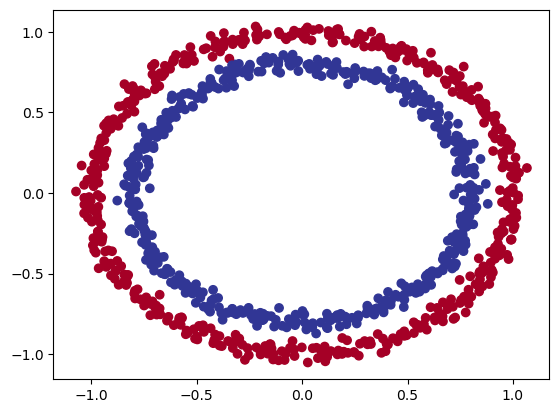

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

# Input and Output Shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

# Steps in Modelling

In [ ]:
# create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(2)
])
# compiling a model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
# fit a model
model_1.fit(X,y,epochs=25)


Epoch 1/25


2023-03-03 19:52:56.679959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 19:52:56.680744: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


32/32 [==============================] - 0s 2ms/step - loss: 2.0874 - accuracy: 0.4790
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 0.7415 - accuracy: 0.4900
Epoch 3/25
32/32 [==============================] - 0s 1ms/step - loss: 0.7156 - accuracy: 0.4930
Epoch 4/25
32/32 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.5000
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 6/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5020
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5050
Epoch 8/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5020
Epoch 9/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5030
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 11/25
32/32 [===========

Improve our model 

In [ ]:
model_1.fit(X,y,epochs=200)
model_1.evaluate(X,y)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5010
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5010
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5020
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5040
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5010
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5020
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5020
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5070
Epoch 11/

[0.6931558847427368, 0.5]

In [ ]:
from keras.engine.sequential import input_layer
# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,name='input_layer'),
    tf.keras.layers.Dense(10,name='hidden_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
])
# complie a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


In [ ]:
model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 2.8049 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7322 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5060
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4530
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4760
Epoch 11/

## Visualize the model predictions
To visualize our model prediction we need to make a function `plot_decision_boundary`  
This function will:  
* Take a trained model
* Create a meshgrid of Different X Values
* Make predictions across the meshgrid
* plot a prediction line between zones

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


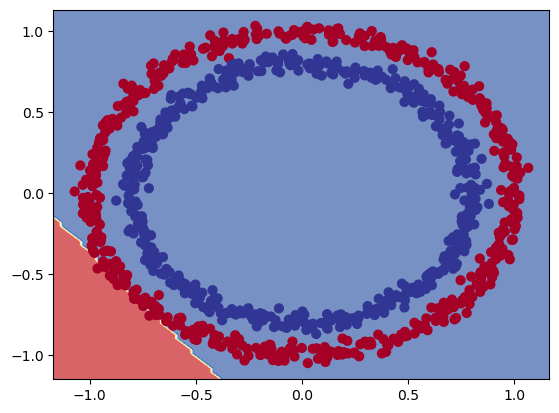

In [ ]:
plot_decision_boundary(model_2,X,y)

## What did we get?
We got to know that from the starting we were trying to classify linearly which is actually impossible to do for two circles  
`The Missing piece` : `Non-linearity`

# Missing piece

In [ ]:
# set the random seed
tf.random.set_seed(42)
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])
# compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# fit a model
model.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 611us/step - loss: 4.4478 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 814us/step - loss: 4.4087 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3900 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3809 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3733 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3664 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3506 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3441 - accuracy: 0.4730
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3384 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3333 - accuracy: 0.4710
Epoch

313/313 [==============================] - 0s 642us/step
doing binary classifcation...


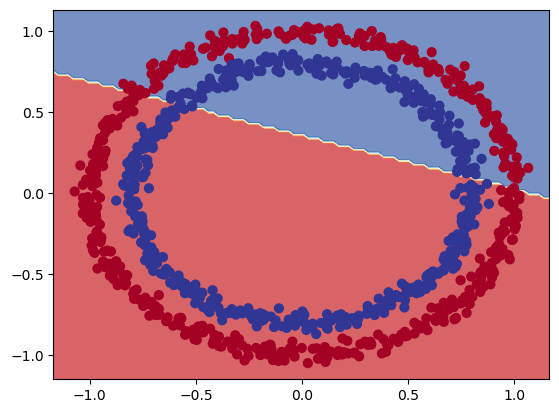

In [ ]:
plot_decision_boundary(model,X,y)

In [ ]:
# random seed
tf.random.set_seed(42)
# create a model
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# compile a model
model_c.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
# fit a model
history=model_c.fit(X,y,epochs=100)

Epoch 1/100


/home/megabeing/miniconda3/envs/Dlenv/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5210
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.5340
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5220
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5350
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5350
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5480
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.5700
Epoch 11/100
32/32 [=

In [ ]:
model_c.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0569 - accuracy: 0.9830


[0.05692868307232857, 0.9829999804496765]

<Axes: >

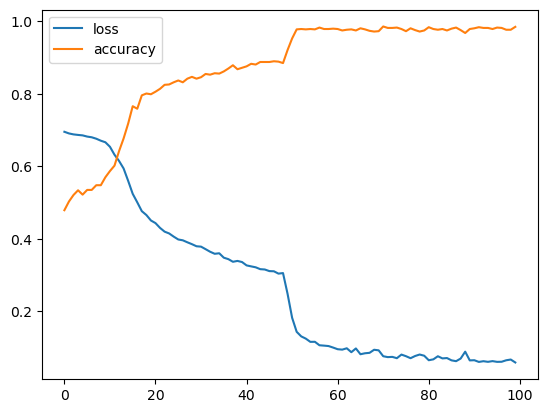

In [ ]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


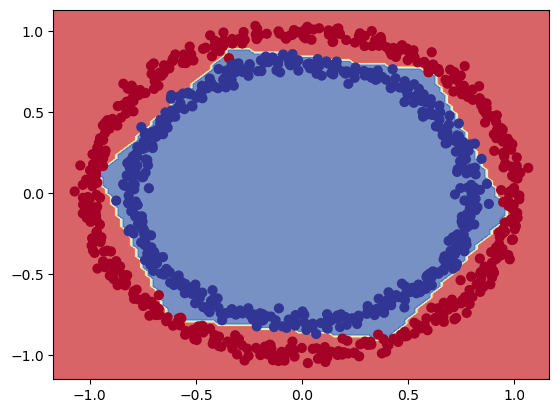

In [ ]:
plot_decision_boundary(model_c,X,y)

# Improve our model
before we were only using the X and y for both testing and training purposes now we need to:  
1. Create a `train_test_split`
2. Fit on `training_data`
3. Evaluate on our `test_split`
4. Improve 
5. loop

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# create a model
clf = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile a model
clf.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            metrics=['accuracy'])

# Fit a model
history=clf.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4938
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4963
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.4913
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.4925
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5238
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5213
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5350
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5425
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5850
Epoch 11/

<Axes: >

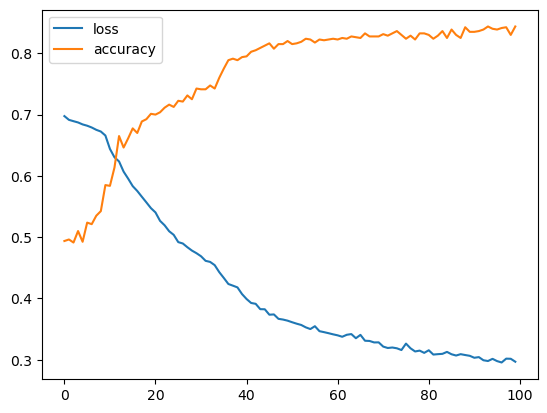

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
clf.evaluate(x_test,y_test)

7/7 [==============================] - 0s 11ms/step - loss: 0.3460 - accuracy: 0.8350


[0.34601908922195435, 0.8349999785423279]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


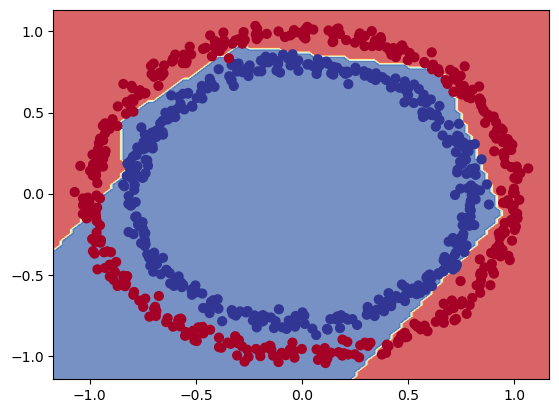

In [ ]:
plot_decision_boundary(clf,x_train,y_train)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


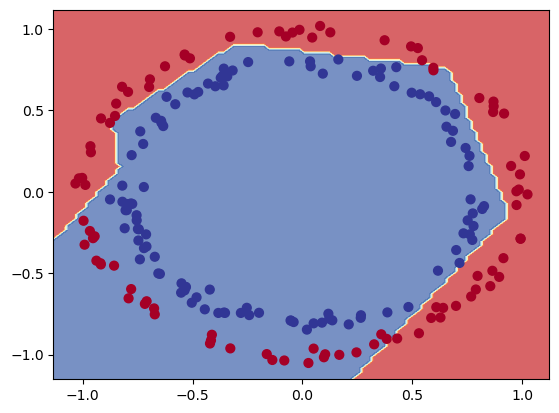

In [ ]:
plot_decision_boundary(clf,x_test,y_test)

## Find the best Learning Rate
To achieve this
* we will use `tf.Callbacks`
    * extra piece of functionality used while training the model
* Modified Loss curves plot

In [ ]:
 # random seed
tf.random.set_seed(42)

# create a model
md = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile a model
md.compile(loss=tf.keras.losses.binary_crossentropy,
           optimizer=tf.keras.optimizers.Adam(),
           metrics=['accuracy'])

# create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history=md.fit(x_train,y_train,callbacks=[lr_scheduler],epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.5138 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5150 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5175 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5175 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

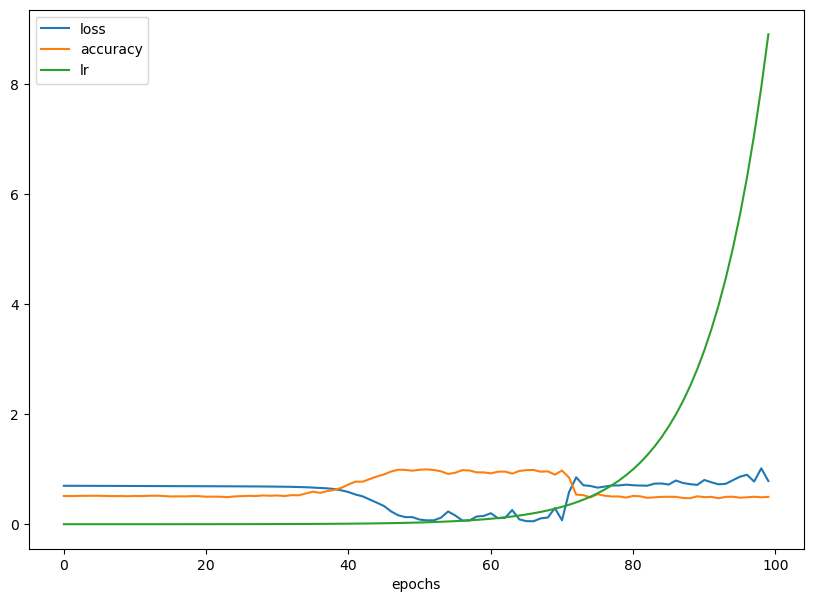

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 0, 'lr')

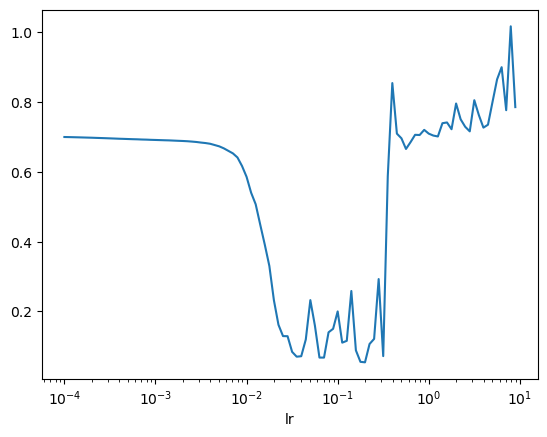

In [ ]:
# plot the curve between loss and learning rate
lrs=1e-4 * 10**(tf.range(100)/20)
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('lr')


![image.png](attachment:image.png)  
This area must be where the ideal learning rate lies

In [ ]:
# create a random seed
tf.random.set_seed(42)

# create a model
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile a model
m1.compile(loss=tf.keras.losses.binary_crossentropy,
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
           metrics=['accuracy'])

# fit a model
m1.fit(x_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5362
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5462
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6762
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7250
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.7862
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7663
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.8213
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.8500
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.9050
Epoch 11/25
25/25 [

In [ ]:
m1.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9950


[0.04801841080188751, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


Text(0.5, 1.0, 'Test')

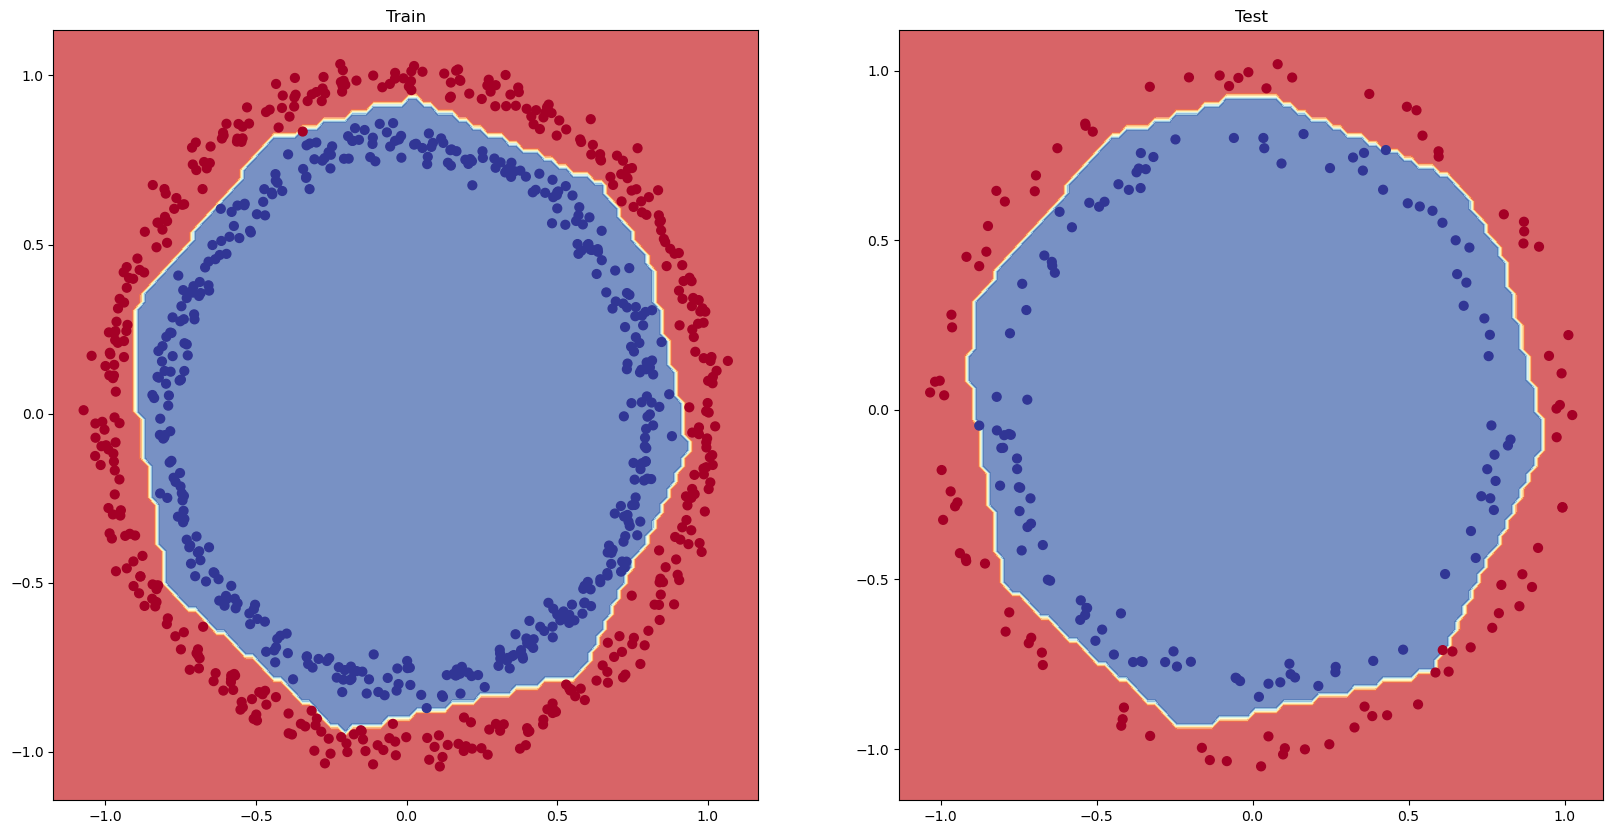

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plot_decision_boundary(m1,x_train,y_train)
plt.title('Train')
plt.subplot(1,2,2)
plot_decision_boundary(m1,x_test,y_test)
plt.title('Test')



# Evaluation Matrix
![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,tf.round(m1.predict(x_test)))

7/7 [==============================] - 0s 9ms/step


array([[ 91,   1],
       [  0, 108]])

In [ ]:
y_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
tf.round(m1.predict(x_test))[:10]

7/7 [==============================] - 0s 8ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

### Beautify our Confusion_matrix

7/7 [==============================] - 0s 21ms/step


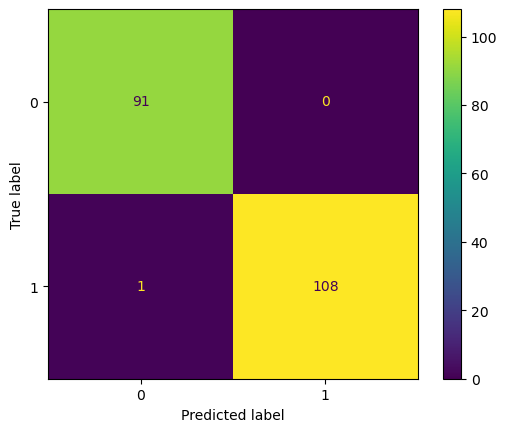

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(tf.round(m1.predict(x_test)),y_test)
ConfusionMatrixDisplay(cm).plot()


# Multi-class classification

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# the data has already been sorted into training and test sets
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'Train_data:\n{train_data}\n')
print(f'Test_data:\n{test_data}\n')

Train_data:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

Test_data:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0

In [ ]:
# check the shape of first example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

In [ ]:
train_data[0],train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

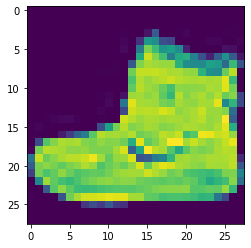

In [ ]:
plt.imshow(train_data[0])

In [ ]:
human_readable={0 :	'T-shirt/top',
1 :'Trouser',
2 :'Pullover',
3 :'Dress',
4 :'Coat',
5 :'Sandal',
6 :'Shirt',
7 :'Sneaker',
8 :'Bag',
9 :'Ankle boot',}

Text(0.5, 1.0, 'Shirt')

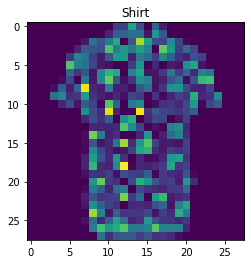

In [ ]:
index = 10002
plt.imshow(train_data[index])
plt.title(human_readable[train_labels[index]])

In [ ]:
# create a model 
mul = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
mul.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history=mul.fit(train_data,train_labels,validation_data=(test_data,test_labels),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 2.4129 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3016 - accuracy: 0.0984 - val_loss: 2.2910 - val_accuracy: 0.1057
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9759 - accuracy: 0.1833 - val_loss: 1.7818 - val_accuracy: 0.2661
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7158 - accuracy: 0.2609 - val_loss: 1.6715 - val_accuracy: 0.2774
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6629 - accuracy: 0.2765 - val_loss: 1.6418 - val_accuracy: 0.2946
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6324 - accuracy: 0.2862 - val_loss: 1.6241 - val_accuracy

<AxesSubplot:>

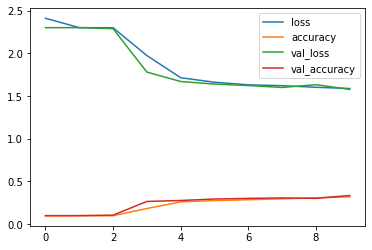

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
mul.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5790 - accuracy: 0.3360


[1.5790287256240845, 0.335999995470047]

### Let's improve our accuracy

In [ ]:
train_data.max()

255

In [ ]:
# normalize our data
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile a model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# fit a model
history=model.fit(train_data_norm,train_labels,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0977 - accuracy: 0.6177
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7129 - accuracy: 0.7629
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6255 - accuracy: 0.7880
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5873 - accuracy: 0.8013
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5603 - accuracy: 0.8098
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5422 - accuracy: 0.8157
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5290 - accuracy: 0.8188
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5192 - accuracy: 0.8218
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5117 - accuracy: 0.8237
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.505

<AxesSubplot:>

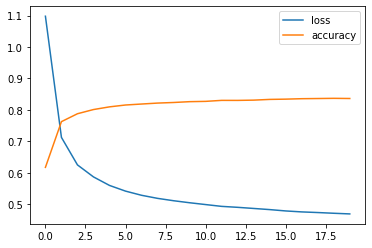

In [ ]:
pd.DataFrame(history.history).plot()

### Let's Find the best learning rate

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

# compile a model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# create a callback
callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# fit a model
history_norm_cal=model.fit(train_data_norm,train_labels,callbacks=[callback],validation_data=(test_data_norm,test_labels),epochs=40)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0171 - accuracy: 0.6254 - val_loss: 0.7080 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6519 - accuracy: 0.7602 - val_loss: 0.6524 - val_accuracy: 0.7608 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6125 - accuracy: 0.7744 - val_loss: 0.6358 - val_accuracy: 0.7690 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5964 - accuracy: 0.7824 - val_loss: 0.6310 - val_accuracy: 0.7713 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5851 - accuracy: 0.7873 - val_loss: 0.6121 - val_accuracy: 0.7771 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5790 - accuracy: 0.7899 - val_loss: 0.6140 - val_accuracy: 0.7788 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

<AxesSubplot:>

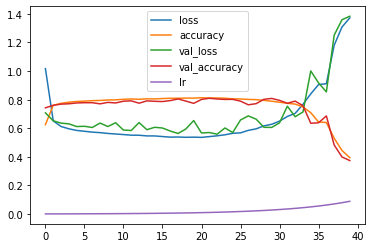

In [ ]:
pd.DataFrame(history_norm_cal.history).plot()

Text(0.5, 0, 'epochs')

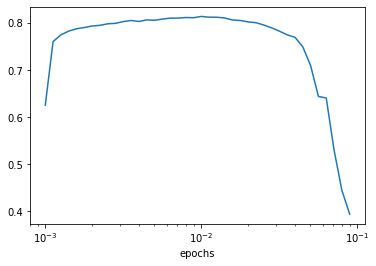

In [ ]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,history_norm_cal.history['accuracy'])
plt.xlabel('epochs')
# plt.xlim([0.001,0.004])

##### Let's create according to that

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile a model with the updated learning rate
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
# fit a model
history_updated = model.fit(train_data_norm,train_labels,validation_data=(test_data_norm,test_labels),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.3531 - accuracy: 0.4863 - val_loss: 0.7680 - val_accuracy: 0.7104
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6528 - accuracy: 0.7686 - val_loss: 0.6097 - val_accuracy: 0.7858
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5670 - accuracy: 0.8040 - val_loss: 0.5805 - val_accuracy: 0.7990
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.8152 - val_loss: 0.5540 - val_accuracy: 0.8095
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5218 - accuracy: 0.8213 - val_loss: 0.5415 - val_accuracy: 0.8142
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5100 - accuracy: 0.8239 - val_loss: 0.5651 - val_accuracy: 0.8015
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5042 - accuracy: 0.8262 - val_loss: 0.5321 - val_accuracy:

In [ ]:
model.save('Significant_model')

#### Evaluate the model

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


Created a Function to create confusion matrix

In [ ]:
y_pred = model.predict(test_data_norm)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.4048045e-10, 2.1425226e-14, 2.3654466e-12, ..., 2.3448178e-01,
        5.8513651e-05, 6.7939717e-01],
       [1.7680684e-03, 3.4105945e-08, 7.0535892e-01, ..., 0.0000000e+00,
        6.3779889e-06, 0.0000000e+00],
       [6.4679298e-08, 9.9981570e-01, 1.1787399e-05, ..., 3.6542862e-38,
        7.5383302e-12, 8.0212587e-29],
       ...,
       [1.0361128e-02, 2.1400997e-08, 9.9761214e-04, ..., 3.5281636e-07,
        8.7828195e-01, 2.0953960e-14],
       [1.1188741e-06, 9.9681443e-01, 2.3723439e-06, ..., 5.4949832e-25,
        9.8043955e-09, 2.2578844e-12],
       [1.0574181e-04, 9.5614512e-09, 4.4987883e-06, ..., 2.7236007e-02,
        1.6545042e-01, 1.2623791e-04]], dtype=float32)

In [ ]:
y_pred[0].argmax(),human_readable[y_pred[0].argmax()]

(9, 'Ankle boot')

In [ ]:
y_pred = y_pred.argmax(axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
confusion_matrix(y_true=test_labels,y_pred=y_pred)

array([[796,   2,  10,  45,   2,   1, 126,   1,  17,   0],
       [  0, 947,  13,  29,   6,   2,   2,   0,   1,   0],
       [ 13,   6, 687,   6, 114,   3, 167,   0,   4,   0],
       [ 61,  12,  11, 790,  47,   4,  69,   0,   6,   0],
       [  1,   2, 103,  18, 695,   2, 166,   0,  13,   0],
       [  1,   0,   0,   0,   0, 878,   1,  76,   6,  38],
       [156,   1,  78,  22,  65,   2, 642,   0,  34,   0],
       [  0,   0,   0,   0,   0,  21,   0, 952,   0,  27],
       [  0,   0,   1,  11,   3,  17,  39,   8, 921,   0],
       [  0,   0,   0,   0,   0,  17,   0,  67,   1, 915]])

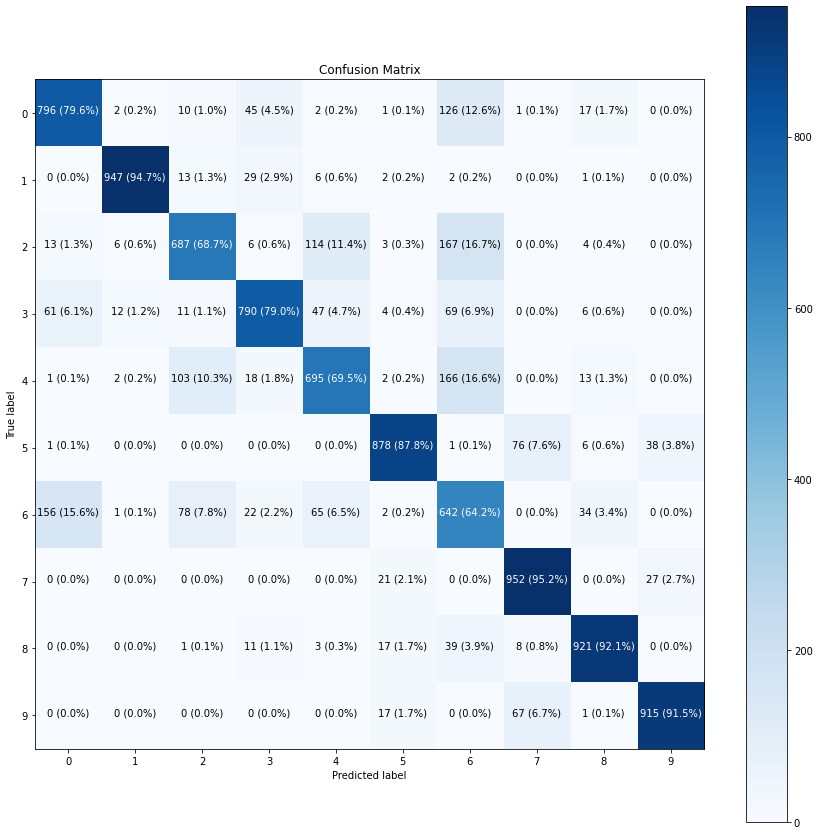

In [ ]:
make_confusion_matrix(y_pred=y_pred,y_true=test_labels,classes=human_readable,figsize=(15,15),text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 23ms/step


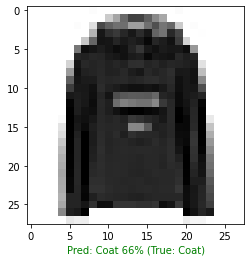

In [ ]:
plot_random_image(model=model,classes=human_readable,images=test_data_norm,true_labels=test_labels)